In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

In [333]:
dataL = pd.read_csv("https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/lowp_finalresults.csv")
dataH = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/homework/2017-10/planetas/highp_finalresults.csv')

#varibales independientes: 
#numero de planetas:
Planetas_H = dataH.groupby(['ident']).size().get_values()
Planetas_L = dataL.groupby(['ident']).size().get_values()
#mas total de planetas
masa_H = dataH.groupby(['ident'])['emepla(i)/emet'].sum().get_values()
masa_L = dataL.groupby(['ident'])['emepla(i)/emet'].sum().get_values()
#eficiencia de masa: 
Em_H = masa_H/dataH.groupby(['ident'])['emed'].mean().get_values()
Em_L = masa_L/dataL.groupby(['ident'])['emed'].mean().get_values()
dataL

,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199992,20000001.0,0.026231,1.185372e-03,1.710156,1.8388847169925493,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
1,0,199992,20000001.0,2.170653,0.000000e+00,1.646707,1.8167126017756039,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
2,0,199992,20000001.0,4.251030,0.000000e+00,1.059631,1.5688831343393115,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
3,0,199992,20000001.0,5.468018,0.000000e+00,0.839156,1.4520602505243447,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
4,0,199992,20000001.0,8.935596,0.000000e+00,0.367578,1.1032029110256696,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
5,0,199992,20000001.0,10.004078,0.000000e+00,0.285016,1.0137037992601885,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
6,0,199992,20000001.0,10.999605,0.000000e+00,0.259724,0.98277696757605926,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
7,0,199992,20000001.0,12.114091,0.000000e+00,0.241331,0.95910139202918709,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
8,0,199992,20000001.0,13.460886,0.000000e+00,0.086527,0.68148117602251179,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00
9,0,199992,20000001.0,14.446044,0.000000e+00,0.083283,0.67288965434180881,4.368174e+32,59.882370,1.110726,51.287674,0.1300,1.0,0.1,1.0,0.1,0.077070,9268935.00


In [114]:
X_L = dataL.drop(['emegas(i)','emepla(i)/emet'],inplace=False,axis=1).groupby(['ident']).mean()
X_H = dataH.drop(['emegas(i)','emepla(i)/emet'],inplace=False,axis=1).groupby(['ident']).mean()

scaler = preprocessing.StandardScaler().fit(X_H)
scaler.transform(X_H)

scaler = preprocessing.StandardScaler().fit(X_L)
scaler.transform(X_L)

array([[ 0.3167378 ,  0.        ,  2.09856586, ..., -1.04720195,
         0.39214288,  2.04063229],
       [ 0.26248232,  0.        , -0.77194317, ..., -1.04720195,
        -0.39885956, -0.19632769],
       [ 0.31690171,  0.        ,  2.49744347, ..., -1.04720195,
         2.43040056,  2.08794374],
       ..., 
       [-1.13597595,  0.        , -0.83510441, ..., -1.04720195,
        -0.14569369, -0.16222951],
       [ 0.3088153 ,  0.        ,  0.34193732, ..., -1.04720195,
        -0.76237153,  1.91942728],
       [ 0.31116473,  0.        ,  0.12942822, ..., -1.04720195,
         1.93418829,  1.43368431]])

In [115]:
XPH_train, XPH_test, YPH_train, YPH_test = train_test_split(X_H, Planetas_H)
XmH_train, XmH_test, YmH_train, YmH_test = train_test_split(X_H, masa_H)
XEH_train, XEH_test, YEH_train, YEH_test = train_test_split(X_H, Em_H)

In [116]:
XPL_train, XPL_test, YPL_train, YPL_test = train_test_split(X_L, Planetas_L)
XmL_train, XmL_test, YmL_train, YmL_test = train_test_split(X_L, masa_L)
XEL_train, XEL_test, YEL_train, YEL_test = train_test_split(X_L, Em_L)

In [342]:
def aciertos(Y_predicado,Y_test):
    aciertos=0
    for i in range(len(Y_test)):
        if(abs(Y_test[i]-Y_predicado[i])<1):
            aciertos+=1
    return aciertos/len(Y_test)*100
        

In [282]:
def gauss(C,gamma,X_train,X_test,Y_train,Y_test):
    kernel_svr = svm.SVR(C=C, kernel='rbf', gamma=gamma)
    kernel_svr.fit(X_train,Y_train)
    rr=kernel_svr.predict(X_test)
    return rr

In [387]:
def solve_gauss(X_train,X_test,Y_train,Y_test):
    C=np.linspace(0.0001,1,4)
    gamma=np.linspace(0.0000001,0.00001,4)
    n=len(C)*len(gamma)
    plt.plot(Y_test,c='r')
    acMax=0
    ac=0
    cMax=0
    gMax=0
    for i in range(len(C)):
        for j in range(len(gamma)):
            rr= gauss(C[i],gamma[j],X_train,X_test,Y_train,Y_test)
            plt.plot(rr)
            ac=aciertos(Y_test,rr)
            if(ac>acMax):
                acMax=ac
                cMax=C[i]
                gMax=gamma[j]
    print (acMax,cMax,gMax)        
    plt.show()

In [388]:
from sklearn import tree
def trees(X_train, X_test, Y_train, Y_test,m):
    trees=tree.DecisionTreeRegressor(criterion=m)
    trees.fit(X_train, Y_train)
    y_pre=trees.predict(X_test)
    print(aciertos(Y_test,y_pre))
    plt.plot(Y_test)
    plt.plot(y_pre)

# Métodos para predecir el número de planetas

23.953823953823957 0.0001 1e-07


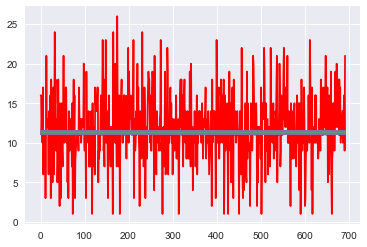

In [389]:
solve_gauss(XPH_train, XPH_test, YPH_train, YPH_test) 
# imprimimos porcentaje aciertos y parámetros C y gamma 

14.285714285714285


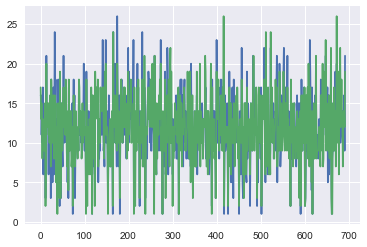

In [382]:
trees(XPH_train, XPH_test, YPH_train, YPH_test,'mae')

16.305916305916305


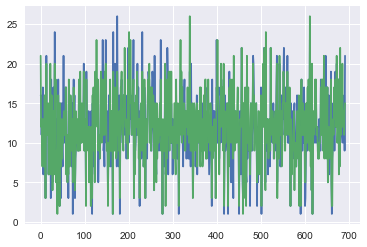

In [385]:
trees(XPH_train, XPH_test, YPH_train, YPH_test,'mse')

0.2886002886002886


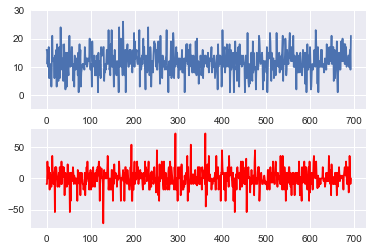

In [386]:
from sklearn import neural_network
neural=neural_network.MLPRegressor(hidden_layer_sizes=200, alpha=0.000001)
neural.fit(XPH_train,YPH_train)
y=neural.predict(XPH_test)
print(aciertos(y,YPH_test))
plt.subplot(211)
plt.plot(YPH_test)
plt.ylim(-5,30)
plt.subplot(212)
plt.plot(y/1e15,c='r')
plt.show()

21.5007215007215


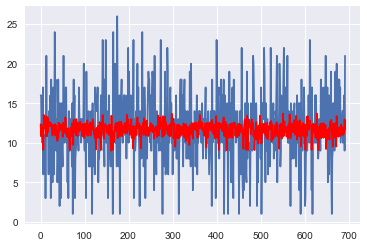

In [350]:
from sklearn import neighbors
nei=neighbors.KNeighborsRegressor(n_neighbors=80)
nei.fit(XPH_train,YPH_train)
ynei=nei.predict(XPH_test)
print(aciertos(ynei,YPH_test))
plt.plot(YPH_test)
plt.plot(ynei,c='r')
plt.show()

22.660818713450293 0.0001 1e-07


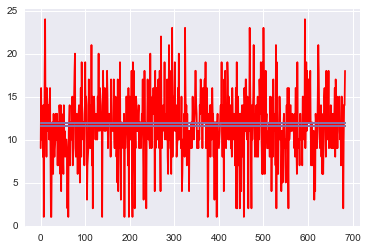

In [390]:
solve_gauss(XPL_train, XPL_test, YPL_train, YPL_test)

10.526315789473683


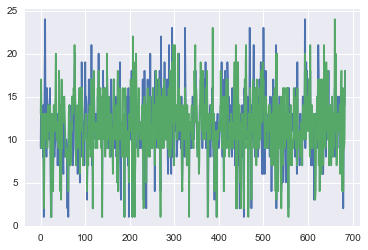

In [352]:
trees(XPL_train, XPL_test, YPL_train, YPL_test,'mae')

11.988304093567251


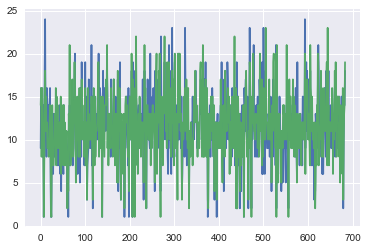

In [353]:
trees(XPL_train, XPL_test, YPL_train, YPL_test,'mse')

0.43859649122807015


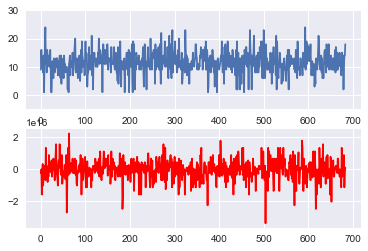

In [354]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XPL_train,YPL_train)
y=neural.predict(XPL_test)
print(aciertos(y,YPL_test))
plt.subplot(211)
plt.plot(YPL_test)
plt.ylim(-5,30)
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

22.22222222222222


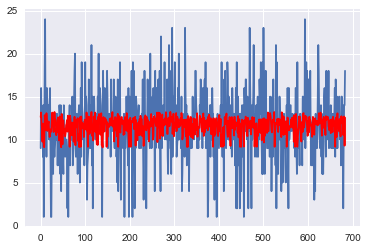

In [381]:
nei=neighbors.KNeighborsRegressor(n_neighbors=100)
nei.fit(XPL_train,YPL_train)
ynei=nei.predict(XPL_test)
print(aciertos(ynei,YPL_test))
plt.plot(YPL_test)
plt.plot(ynei,c='r')
plt.show()

El mejor porcentaje de aciertos, usando tanto la base Low como la High, lo encontramos utilizando SVM, la función SVR, con un un kernel gaussiano. Con la seri High obtuvimos un porcentaje de aciertos del 23.95%, usando como parámetros C=0.0001 y gamma = 1e-07. Aunque, usando la función neighbors.KNeighborsRegressor, obtenemos un porcentaje de aciertos del 22%

# Métodos para calcular la masa del sistema

14.862914862914863 0.01 1e-05


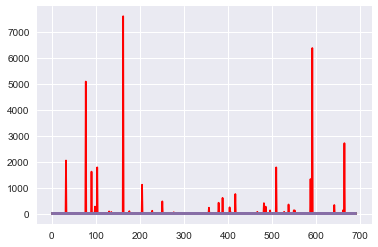

In [359]:
solve_gauss(XmH_train, XmH_test, YmH_train, YmH_test)

51.082251082251084


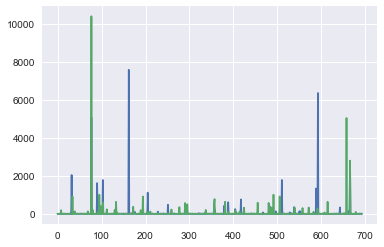

In [360]:
trees(XmH_train, XmH_test, YmH_train, YmH_test,'mae')

48.917748917748916


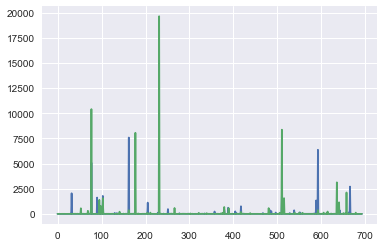

In [361]:
trees(XmH_train, XmH_test, YmH_train, YmH_test,'mse')

2.3088023088023086


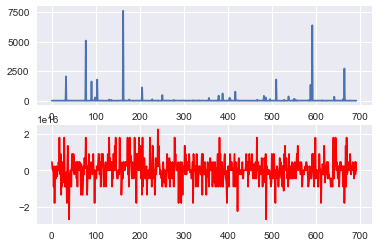

In [362]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XmH_train,YmH_train)
y=neural.predict(XmH_test)
plt.subplot(211)
plt.plot(YmH_test)
print(aciertos(y,YmH_test))
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

15.873015873015872


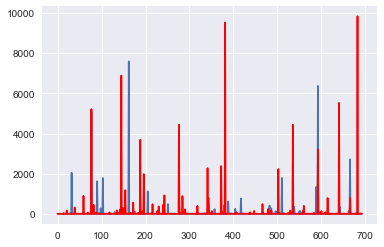

In [370]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XmH_train,YmH_train)
ynei=nei.predict(XmH_test)
print(aciertos(ynei,YmH_test))
plt.plot(YmH_test)
plt.plot(ynei,c='r')
plt.show()

14.035087719298245 0.01 1e-05


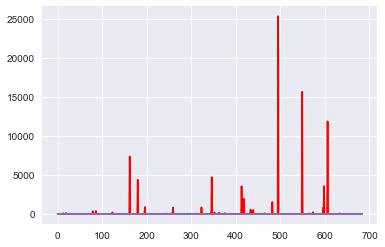

In [371]:
solve_gauss(XmL_train, XmL_test, YmL_train, YmL_test)

45.90643274853801


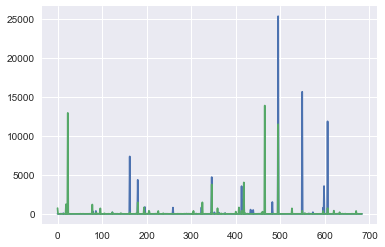

In [372]:
trees(XmL_train, XmL_test, YmL_train, YmL_test,'mae')

44.44444444444444


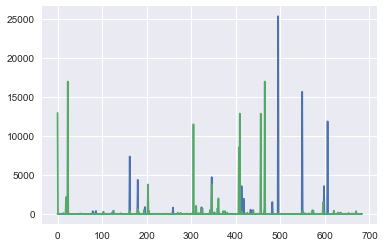

In [373]:
trees(XmL_train, XmL_test, YmL_train, YmL_test,'mse')

1.608187134502924


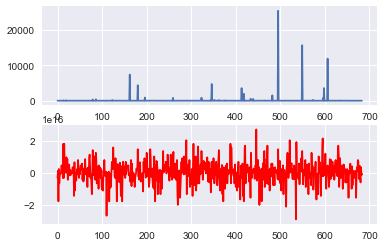

In [374]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XmL_train,YmL_train)
y=neural.predict(XmL_test)
plt.subplot(211)
plt.plot(YmL_test)
print(aciertos(y,YmL_test))
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

17.105263157894736


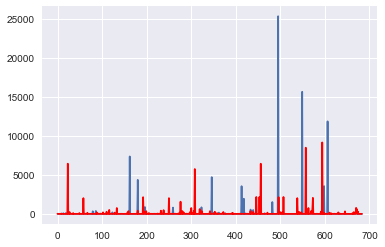

In [379]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XmL_train,YmL_train)
ynei=nei.predict(XmL_test)
print(aciertos(ynei,YmL_test))
plt.plot(YmL_test)
plt.plot(ynei,c='r')
plt.show()

Tanto para la serie Low como para High, el mejor método de predicción es utilizar tree.DecisionTreeRegressor(criterion=m), 
con el criterio 'mae'. En el caso de la serie Low, obtuvimos un porcentaje de 45.9%, y para la serie High, un porcentaje de 
aciertos de 51%. 


# Métodos para predecir eficiencia de masa

0.5772005772005772 0.0001 1e-07


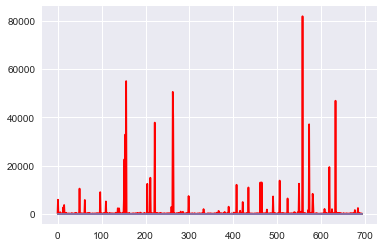

In [393]:
solve_gauss(XEH_train, XEH_test, YEH_train, YEH_test)

2.3088023088023086


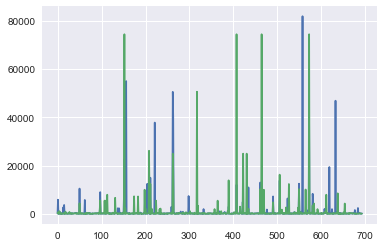

In [394]:
trees(XEH_train, XEH_test, YEH_train, YEH_test,'mae')

1.443001443001443


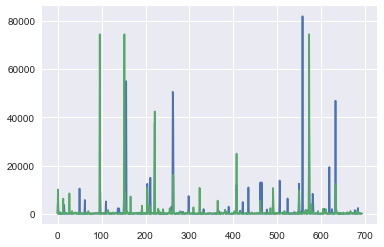

In [395]:
trees(XEH_train, XEH_test, YEH_train, YEH_test,'mse')

0.0


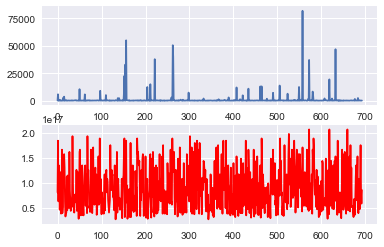

In [396]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XEH_train,YEH_train)
y=neural.predict(XEH_test)
print(aciertos(y,YEH_test))
plt.subplot(211)
plt.plot(YEH_test)

plt.subplot(212)
plt.plot(y,c='r')
plt.show()

0.1443001443001443


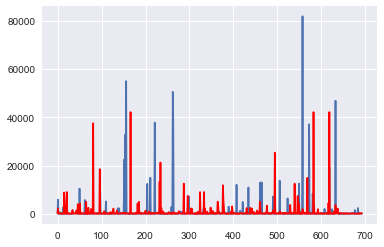

In [397]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XEH_train,YEH_train)
ynei=nei.predict(XEH_test)
print(aciertos(ynei,YEH_test))
plt.plot(YEH_test)
plt.plot(ynei,c='r')
plt.show()

0.43859649122807015 0.6667 1e-07


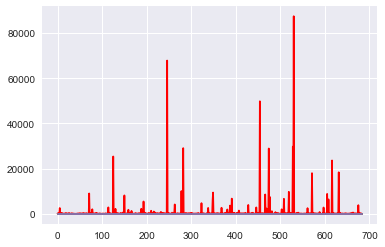

In [398]:
solve_gauss(XEL_train, XEL_test, YEL_train, YEL_test)

1.1695906432748537


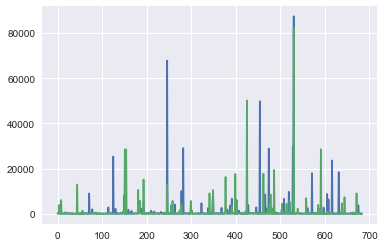

In [399]:
trees(XEL_train, XEL_test, YEL_train, YEL_test,'mae')

1.7543859649122806


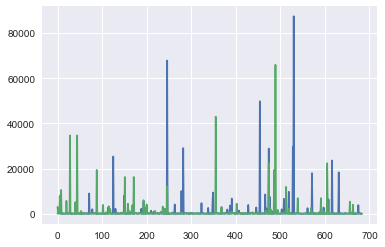

In [400]:
trees(XEL_train, XEL_test, YEL_train, YEL_test,'mse')

0.0


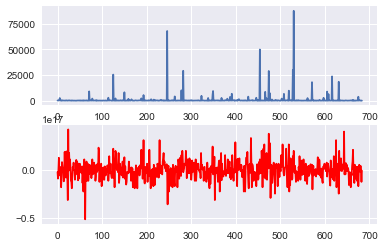

In [402]:
neural=neural_network.MLPRegressor(hidden_layer_sizes=300, alpha=0.00000001)
neural.fit(XEL_train,YEL_train)
y=neural.predict(XEL_test)
print(aciertos(y,YEL_test))
plt.subplot(211)
plt.plot(YEL_test)
plt.subplot(212)
plt.plot(y,c='r')
plt.show()

0.43859649122807015


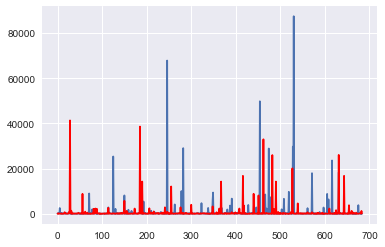

In [403]:
nei=neighbors.KNeighborsRegressor(n_neighbors=2)
nei.fit(XEL_train,YEL_train)
ynei=nei.predict(XEL_test)
print(aciertos(ynei,YEL_test))
plt.plot(YEL_test)
plt.plot(ynei,c='r')
plt.show()

Usando la serie High, la mejor predicción se encuentra utilizando árboles de decisión con el parámetro 'mae'. Obtuvimos un 
porcentaje de 2.3% de aciertos. Para la serie Low, utilizando la misma función, pero el parámetro 'mse', se obtiene un  
porcentaje de aciertos de 1.75%, siendo este el mejor resultado obtenido. 

# Modelos para determinar parámetros de entrada que más influyen en la predicción 

In [404]:
def lasso(X_train,X_test, Y_train,b):
    clf = linear_model.Lasso(alpha=b)
    clf.fit(X_train, Y_train)
    Y_p=clf.predict(X_test)
    return (clf.coef_,Y_p)

In [405]:
cof1,Y1=lasso(XPH_train,XPH_test, YPH_train,0.000001)
cof2,Y2=lasso(XPH_train,XPH_test, YPH_train,0.0001)
cof3,Y3=lasso(XPH_train,XPH_test, YPH_train,0.01)
cof4,Y4=lasso(XPH_train,XPH_test, YPH_train,1)
cof5,Y5=lasso(XPH_train,XPH_test, YPH_train,100)
cof6,Y6=lasso(XPH_train,XPH_test, YPH_train,10000)

print(aciertos(YPH_test,Y1))
print(aciertos(YPH_test,Y2))
print(aciertos(YPH_test,Y3))
print(aciertos(YPH_test,Y4))
print(aciertos(YPH_test,Y5))
print(aciertos(YPH_test,Y6))


25.252525252525253
25.252525252525253
25.541125541125542
22.7994227994228
24.0981240981241
24.0981240981241


In [418]:
print(cof1)
print(cof2)
print(cof3)
print(cof4)
print(cof5)
print(cof6)
XPH_train.head

[  1.29768776e-04   0.00000000e+00  -7.36228938e-01   3.63918548e-33
   1.70792724e-02   1.70478121e-02   7.33591736e-03   8.88371124e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.08263194e+00  -1.24570815e-07]
[  1.29791428e-04   0.00000000e+00  -7.35411795e-01   3.63753839e-33
   1.71814170e-02   1.70707924e-02   7.38643808e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.07713206e+00  -1.24830040e-07]
[  1.31464514e-04   0.00000000e+00  -6.97413761e-01   3.46005973e-33
   1.63449283e-02   2.50070462e-02   5.69724549e-03  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.68740151e+00  -1.37337487e-07]
[  1.31782348e-04   0.00000000e+00  -1.36642647e-01   1.93801978e-33
  -0.00000000e+00   1.98695869e-02  -2.62784051e-02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -3.23177462e-07]
[  1.17020847e-04   0.000000

<bound method NDFrame.head of            it           t       a(i)       emestar         rc       qest  \
ident                                                                      
332    199998  20000001.0  15.953095  1.058151e+33  43.158943   1.437252   
109    199970  20000001.0   7.536162  4.805660e+32  48.115391   2.150903   
984    190853  20000001.0   1.515460  3.538876e+32  57.798248   9.668761   
2211   199963  20000001.0   5.633848  6.187585e+32  45.634365   2.248092   
38     182244  20000001.0   1.706104  4.899053e+32  38.100475  14.856460   
2212   199963  20000001.0   2.684311  2.429558e+32  33.765953   3.222517   
2164    86991  20000001.0   1.285369  7.021205e+32  38.869556  24.854151   
2178   197611  20000001.0   1.932220  2.116667e+32  59.456158   3.742651   
328    199617  20000001.0   1.679514  3.996582e+32  48.570168   2.887445   
1836   199599  20000001.0   1.895186  4.580302e+32  37.589348   6.714768   
2150   199984  20000001.0   8.463637  5.172724e+32  38.192

Para el número de planetas.Tomamos la serie High. Se puede notar que los primeros parámetros que desaparecen son los que son constantes para todos los planetas. Luego, vemos que el porcentaje de aciertos no varía demasiado cuando variamos el alpha para el método Lazo, pero sí se descartan varios parámetros en la estimación, dejando solamente taugas, it y emestar

In [408]:
cofm1,Ym1=lasso(XmH_train,XmH_test, YmH_train,0.000001)
cofm2,Ym2=lasso(XmH_train,XmH_test, YmH_train,0.0001)
cofm3,Ym3=lasso(XmH_train,XmH_test, YmH_train,0.01)
cofm4,Ym4=lasso(XmH_train,XmH_test, YmH_train,1)
cofm5,Ym5=lasso(XmH_train,XmH_test, YmH_train,100)
cofm6,Ym6=lasso(XmH_train,XmH_test, YmH_train,100000)

print(aciertos(YmH_test,Ym1))
print(aciertos(YmH_test,Ym2))
print(aciertos(YmH_test,Ym3))
print(aciertos(YmH_test,Ym4))
print(aciertos(YmH_test,Ym5))
print(aciertos(YmH_test,Ym6))

0.7215007215007215
0.7215007215007215
0.8658008658008658
0.4329004329004329
0.7215007215007215
0.7215007215007215


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


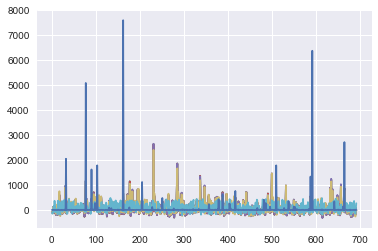

[ -2.41480450e-03   0.00000000e+00  -3.60202836e+01   9.63782669e-32
   8.70697522e+00   9.12296601e+00   9.86763824e+00   1.06093029e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.71285628e+02  -7.75152574e-06]
[ -2.41474928e-03   0.00000000e+00  -3.60167779e+01   9.63779925e-32
   8.70777533e+00   9.12266086e+00   9.86811445e+00   1.06028990e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.71270251e+02  -7.75268024e-06]
[ -2.40922758e-03   0.00000000e+00  -3.56662095e+01   9.63505539e-32
   8.78778622e+00   9.09214566e+00   9.91573523e+00   9.96250493e+02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.69732605e+02  -7.86813064e-06]
[ -2.19768359e-03   0.00000000e+00  -2.71304101e+01   8.16154531e-32
   9.97033332e+00   9.25526196e+00   1.05213868e+01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.13439232e+02  -1.06478347e-05]
[ -1.36527114e-03   0.000000

In [409]:
plt.plot(Ym1)
plt.plot(Ym2)
plt.plot(Ym3)
plt.plot(Ym4)
plt.plot(Ym5)
plt.plot(Ym6)
plt.plot(YmH_test)
plt.show()

print(cofm1)
print(cofm2)
print(cofm3)
print(cofm4)
print(cofm5)
print(cofm6)

Determinar la masa total de planetas usando la serie High. El porcentaje de aciertos sigue siendo muy bajo. Notamos que los parámetros más influyentes son it, emestar, rc, qest, sigmag_0 y taugas

In [410]:
cofE1,YE1=lasso(XEH_train,XEH_test, YEH_train,0.000001)
cofE2,YE2=lasso(XEH_train,XEH_test, YEH_train,0.0001)
cofE3,YE3=lasso(XEH_train,XEH_test, YEH_train,0.01)
cofE4,YE4=lasso(XEH_train,XEH_test, YEH_train,1)
cofE5,YE5=lasso(XEH_train,XEH_test, YEH_train,100)
cofE6,YE6=lasso(XEH_train,XEH_test, YEH_train,10000)

print(aciertos(YEH_test,YE1))
print(aciertos(YEH_test,YE2))
print(aciertos(YEH_test,YE3))
print(aciertos(YEH_test,YE4))
print(aciertos(YEH_test,YE5))
print(aciertos(YEH_test,YE6))

0.0
0.0
0.0
0.0
0.1443001443001443
0.1443001443001443


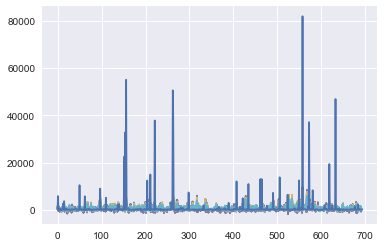

[ -1.37500596e-02   0.00000000e+00  -8.33213785e+01   1.72241198e-30
   3.50748206e+01  -3.43501640e+01   4.79683007e+01  -1.44219882e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.93792565e+03  -6.02225482e-05]
[ -1.37500898e-02   0.00000000e+00  -8.33241072e+01   1.72240947e-30
   3.50740563e+01  -3.43497519e+01   4.79678294e+01  -1.44213864e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.93793346e+03  -6.02216716e-05]
[ -1.37531088e-02   0.00000000e+00  -8.35969729e+01   1.72215852e-30
   3.49976296e+01  -3.43085391e+01   4.79206980e+01  -1.43612043e+04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.93871484e+03  -6.01340155e-05]
[ -1.40550101e-02   0.00000000e+00  -1.10883550e+02   1.69706302e-30
   2.73549596e+01  -3.01872657e+01   4.32075631e+01  -8.34298900e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.01685268e+03  -5.13684027e-05]
[ -2.59558538e-03   0.000000

In [411]:
plt.plot(YE1)
plt.plot(YE2)
plt.plot(YE3)
plt.plot(YE4)
plt.plot(YE5)
plt.plot(YE6)
plt.plot(YEH_test)
plt.show()

print(cofE1)
print(cofE2)
print(cofE3)
print(cofE4)
print(cofE5)
print(cofE6)

Usando la serie High para la eficiencia de la masa, los parámetros más relevantes son it, emestar, sigmag_0, y taugas

In [412]:
cofPL1,YPL1=lasso(XPL_train,XPL_test, YPL_train,0.000001)
cofPL2,YPL2=lasso(XPL_train,XPL_test, YPL_train,0.0001)
cofPL3,YPL3=lasso(XPL_train,XPL_test, YPL_train,0.01)
cofPL4,YPL4=lasso(XPL_train,XPL_test, YPL_train,1)
cofPL5,YPL5=lasso(XPL_train,XPL_test, YPL_train,100)
cofPL6,YPL6=lasso(XPL_train,XPL_test, YPL_train,10000)

print(aciertos(YPL_test,YPL1))
print(aciertos(YPL_test,YPL2))
print(aciertos(YPL_test,YPL3))
print(aciertos(YPL_test,YPL4))
print(aciertos(YPL_test,YPL5))
print(aciertos(YPL_test,YPL6))

27.485380116959064
27.485380116959064
27.485380116959064
27.923976608187136
25.0
24.561403508771928


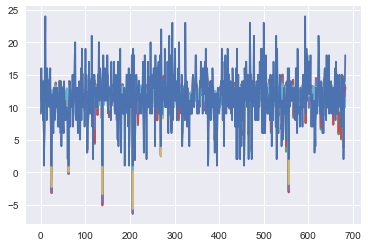

[  1.00825578e-04   0.00000000e+00  -8.28462528e-01   5.06199271e-33
  -3.70066821e-04  -3.82034937e-02   1.58019844e-03   9.24581710e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.60746773e+00   1.80829413e-08]
[  1.00893241e-04   0.00000000e+00  -8.24117315e-01   5.06005011e-33
   5.01779897e-04  -3.84795120e-02   2.06240339e-03   8.55914466e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.58855529e+00   1.67098763e-08]
[  1.03244143e-04   0.00000000e+00  -7.31616446e-01   4.85609846e-33
   1.07188482e-02  -3.28696112e-02   6.57804737e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.98820770e+00  -1.22261583e-08]
[  1.06047913e-04   0.00000000e+00  -8.32349084e-02   2.81981405e-33
  -0.00000000e+00   0.00000000e+00  -2.39514156e-02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -2.17522580e-07]
[  9.67653672e-05   0.000000

In [413]:
plt.plot(YPL1)
plt.plot(YPL2)
plt.plot(YPL3)
plt.plot(YPL4)
plt.plot(YPL5)
plt.plot(YPL6)
plt.plot(YPL_test)
plt.show()

print(cofPL1)
print(cofPL2)
print(cofPL3)
print(cofPL4)
print(cofPL5)
print(cofPL6)

In [414]:
cofmL1,YmL1=lasso(XmL_train,XmL_test, YmL_train,0.000001)
cofmL2,YmL2=lasso(XmL_train,XmL_test, YmL_train,0.0001)
cofmL3,YmL3=lasso(XmL_train,XmL_test, YmL_train,0.01)
cofmL4,YmL4=lasso(XmL_train,XmL_test, YmL_train,1)
cofmL5,YmL5=lasso(XmL_train,XmL_test, YmL_train,100)
cofmL6,YmL6=lasso(XmL_train,XmL_test, YmL_train,10000)

print(aciertos(YmL_test,YmL1))
print(aciertos(YmL_test,YmL2))
print(aciertos(YmL_test,YmL3))
print(aciertos(YmL_test,YmL4))
print(aciertos(YmL_test,YmL5))
print(aciertos(YmL_test,YmL6))

0.5847953216374269
0.5847953216374269
0.7309941520467835
0.43859649122807015
0.14619883040935672
0.29239766081871343


C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


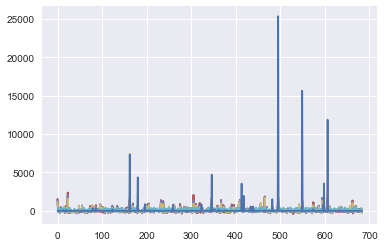

[ -1.42184505e-03   0.00000000e+00   7.43153299e+01  -2.97474011e-31
  -5.39802544e+00   2.51740337e+01  -4.16287723e+00   8.61563924e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.85521526e+02  -3.00970188e-05]
[ -1.42178569e-03   0.00000000e+00   7.43191914e+01  -2.97474177e-31
  -5.39715618e+00   2.51736808e+01  -4.16238152e+00   8.61496681e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.85503989e+02  -3.00981446e-05]
[ -1.41584913e-03   0.00000000e+00   7.47053470e+01  -2.97490733e-31
  -5.31022960e+00   2.51383905e+01  -4.11281035e+00   8.54772388e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.83750291e+02  -3.02107235e-05]
[ -8.25545664e-04   0.00000000e+00   1.13285451e+02  -2.98988368e-31
   3.30225747e+00   2.16017681e+01   8.10497726e-01   1.85069075e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.62503294e+00  -4.14587118e-05]
[ -1.72936752e-03   0.000000

In [415]:
plt.plot(YmL1)
plt.plot(YmL2)
plt.plot(YmL3)
plt.plot(YmL4)
plt.plot(YmL5)
plt.plot(YmL6)
plt.plot(YmL_test)
plt.show()

print(cofmL1)
print(cofmL2)
print(cofmL3)
print(cofmL4)
print(cofmL5)
print(cofmL6)

In [416]:
cofEL1,YEL1=lasso(XEL_train,XEL_test, YEL_train,0.000001)
cofEL2,YEL2=lasso(XEL_train,XEL_test, YEL_train,0.0001)
cofEL3,YEL3=lasso(XEL_train,XEL_test, YEL_train,0.01)
cofEL4,YEL4=lasso(XEL_train,XEL_test, YEL_train,1)
cofEL5,YEL5=lasso(XEL_train,XEL_test, YEL_train,100)
cofEL6,YEL6=lasso(XEL_train,XEL_test, YEL_train,10000)

print(aciertos(YEL_test,YEL1))
print(aciertos(YEL_test,YEL2))
print(aciertos(YEL_test,YEL3))
print(aciertos(YEL_test,YEL4))
print(aciertos(YEL_test,YEL5))
print(aciertos(YEL_test,YEL6))

0.0
0.0
0.0
0.14619883040935672
0.14619883040935672
0.29239766081871343


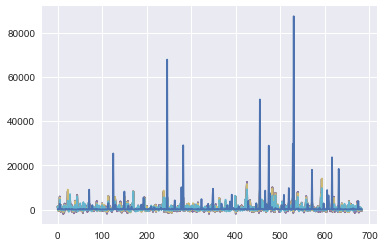

[ -1.29432576e-02   0.00000000e+00   2.95191468e+02  -1.27884251e-31
   2.77657677e+01   6.12220056e+01   3.82399466e+01  -1.59285927e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.43207111e+03  -1.49130980e-04]
[ -1.29433001e-02   0.00000000e+00   2.95188110e+02  -1.27885571e-31
   2.77649701e+01   6.12224089e+01   3.82394838e+01  -1.59223092e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.43208134e+03  -1.49129994e-04]
[ -1.29475484e-02   0.00000000e+00   2.94852255e+02  -1.28017618e-31
   2.76852095e+01   6.12627363e+01   3.81932093e+01  -1.52939601e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.43310437e+03  -1.49031386e-04]
[ -1.29489116e-02   0.00000000e+00   2.88551500e+02  -1.40388573e-31
   2.56973934e+01   6.26935320e+01   3.69858047e+01  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.43213234e+03  -1.47174107e-04]
[ -3.63324140e-03   0.000000

In [417]:
plt.plot(YEL1)
plt.plot(YEL2)
plt.plot(YEL3)
plt.plot(YEL4)
plt.plot(YEL5)
plt.plot(YEL6)
plt.plot(YEL_test)
plt.show()

print(cofEL1)
print(cofEL2)
print(cofEL3)
print(cofEL4)
print(cofEL5)
print(cofEL6)

Usamos la series low para las mismas variables anteriores y obtuvimos resultados muy similares. Las componenetes principales en cada estimación son las mismas que en las series High.